<a href="https://colab.research.google.com/github/slapazromero/Heart_RN/blob/main/Ejercicios_RN_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import ConfusionMatrixDisplay
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import tensorflow as tf
from keras.utils import to_categorical

# Preproceso.

## Importacion de los datos del dataset.

In [ ]:
heart = pd.read_csv('heart.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## Modificaciones de los datos.

In [ ]:
le = preprocessing.LabelEncoder()
heart['Sex'] = le.fit_transform(heart.Sex.values)
heart['ChestPainType'] = le.fit_transform(heart.ChestPainType.values)
heart['RestingECG'] = le.fit_transform(heart.RestingECG.values)
heart['ExerciseAngina'] = le.fit_transform(heart.ExerciseAngina.values)
heart['ST_Slope'] = le.fit_transform(heart.ST_Slope.values)

In [ ]:
copy = heart['Oldpeak'].copy()
for i in range(len(copy)):
  if copy[i] < 0:
    copy[i] *= -1
heart['Oldpeak'] = copy

In [ ]:
copy = heart['Oldpeak'].copy()
for i in range(len(copy)):
  if copy[i] < 0:
    copy[i] = copy.mean()
heart['Oldpeak'] = copy

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.915251,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.042712,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

<Axes: >

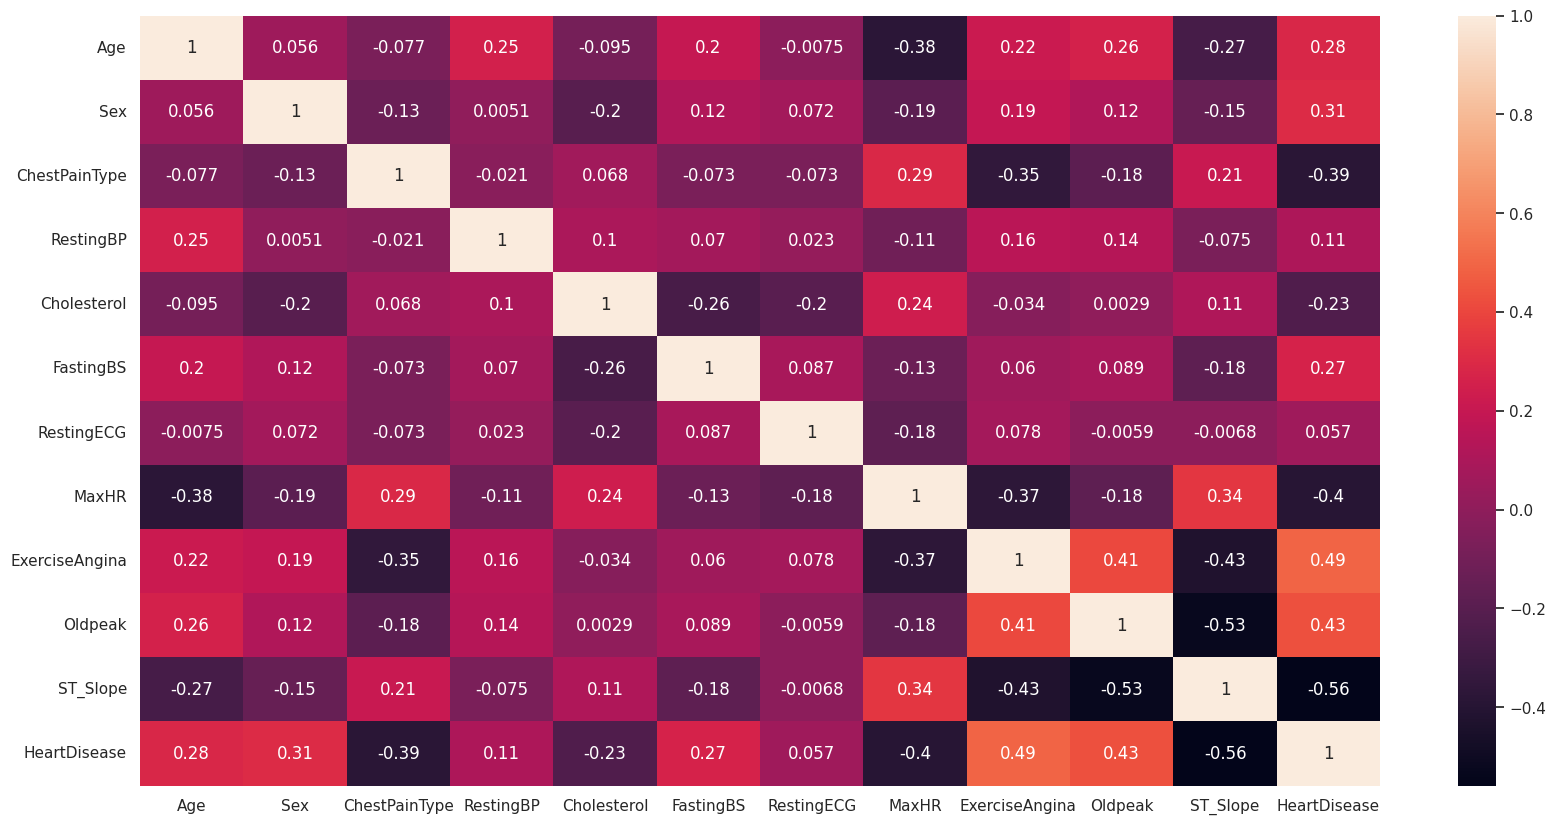

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(heart.corr(), annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [ ]:
caracteristicas = ['ST_Slope', 'Sex', 'ChestPainType', 'FastingBS']
#caracteristicas = heart.drop('HeartDisease', axis=1).columns.to_list()
resultado = ['HeartDisease']

## Separar datos entre datos de entrada y etiquetas (resultados).



In [ ]:
x_heart = heart[caracteristicas]
y_heart = heart[resultado]

## Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_heart, y_heart, test_size=0.20)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(734, 2)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [ ]:
model = tf.keras.models.Sequential()

input_shape = (len(x_train.columns),)

init = tf.keras.initializers.TruncatedNormal(stddev = 0.01, seed = 1)

model.add(
    tf.keras.layers.Dense(
      int(len(x_train.columns) * 4),
      activation='relu',
      input_shape = input_shape,
      kernel_initializer='he_uniform'
    )
)

model.add(
    tf.keras.layers.Dense(
        int(len(y_train[0])),
        activation = 'softmax',
        kernel_initializer = init
    )
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


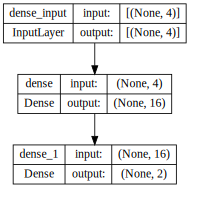

In [ ]:
SVG(model_to_dot(
    model, show_shapes= True, 
    show_layer_names=True, 
    dpi=85).create(prog='dot', format='svg'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Realizar una predicción con los datos de prueba.

In [ ]:
batch_size = int(math.sqrt(len(x_train)))

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=64, mode='max', verbose=0)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.75, patience=32, mode='max', verbose=0)

In [ ]:
history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = 1000,
          callbacks = [early_stop, reduce_lr],
          use_multiprocessing = True,
          validation_data = (x_test, y_test))

Epoch 1/1000
28/28 [==============================] - 1s 11ms/step - loss: 0.5462 - accuracy: 0.7343 - val_loss: 0.4144 - val_accuracy: 0.7935 - lr: 0.0100
Epoch 2/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7875 - val_loss: 0.3539 - val_accuracy: 0.8098 - lr: 0.0100
Epoch 3/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8065 - val_loss: 0.3540 - val_accuracy: 0.8261 - lr: 0.0100
Epoch 4/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8120 - val_loss: 0.3427 - val_accuracy: 0.8261 - lr: 0.0100
Epoch 5/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.7970 - val_loss: 0.3384 - val_accuracy: 0.8804 - lr: 0.0100
Epoch 6/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8161 - val_loss: 0.3481 - val_accuracy: 0.8261 - lr: 0.0100
Epoch 7/1000
28/28 [==============================] - 0s 3ms/step - l

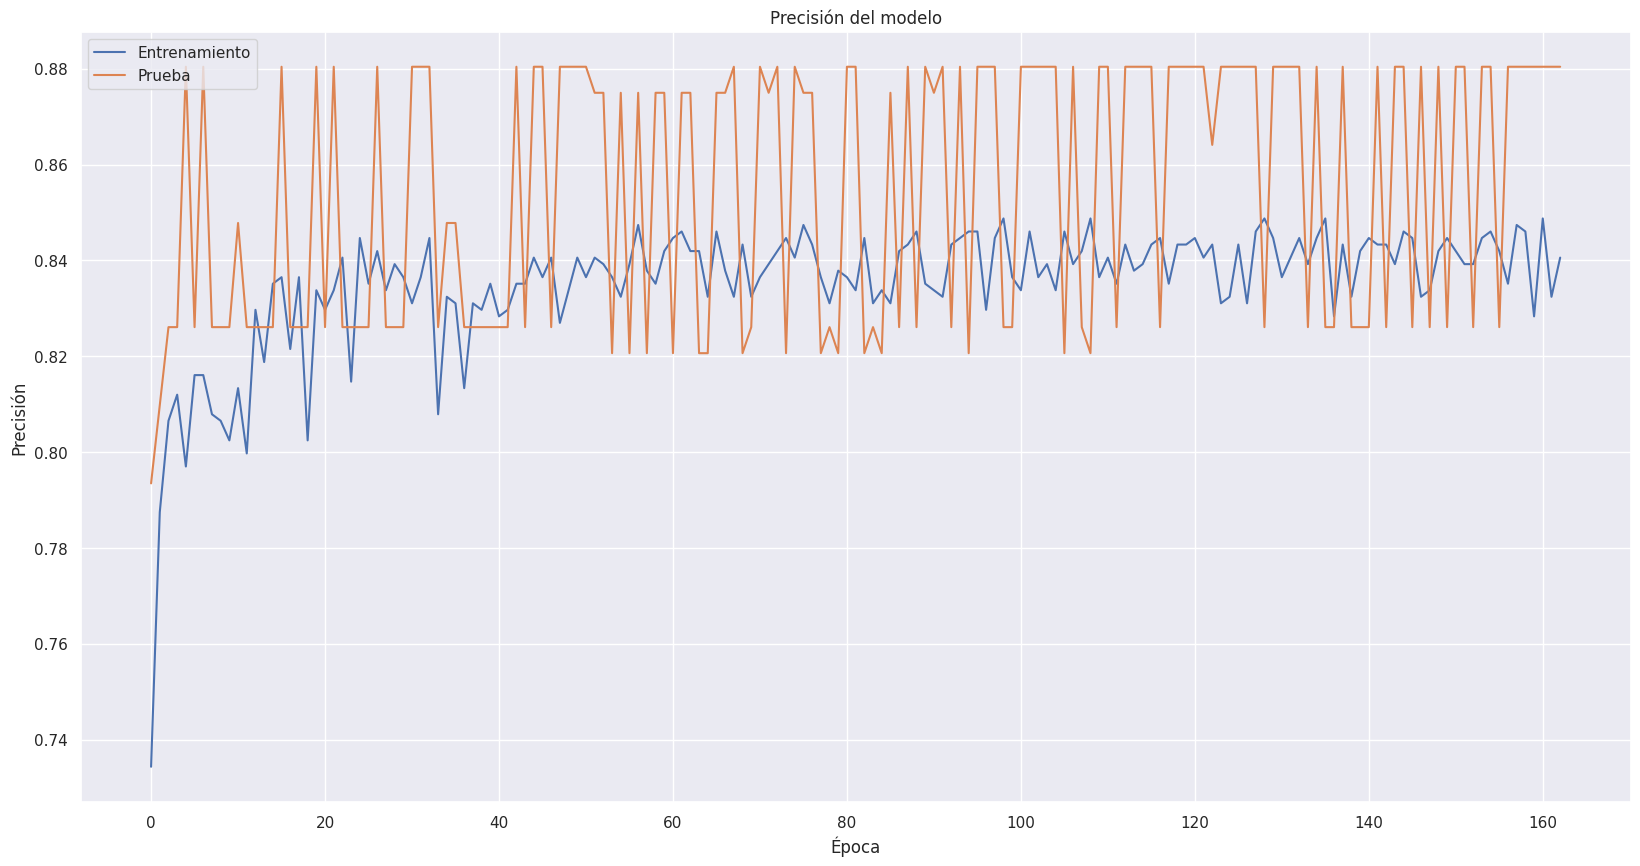

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

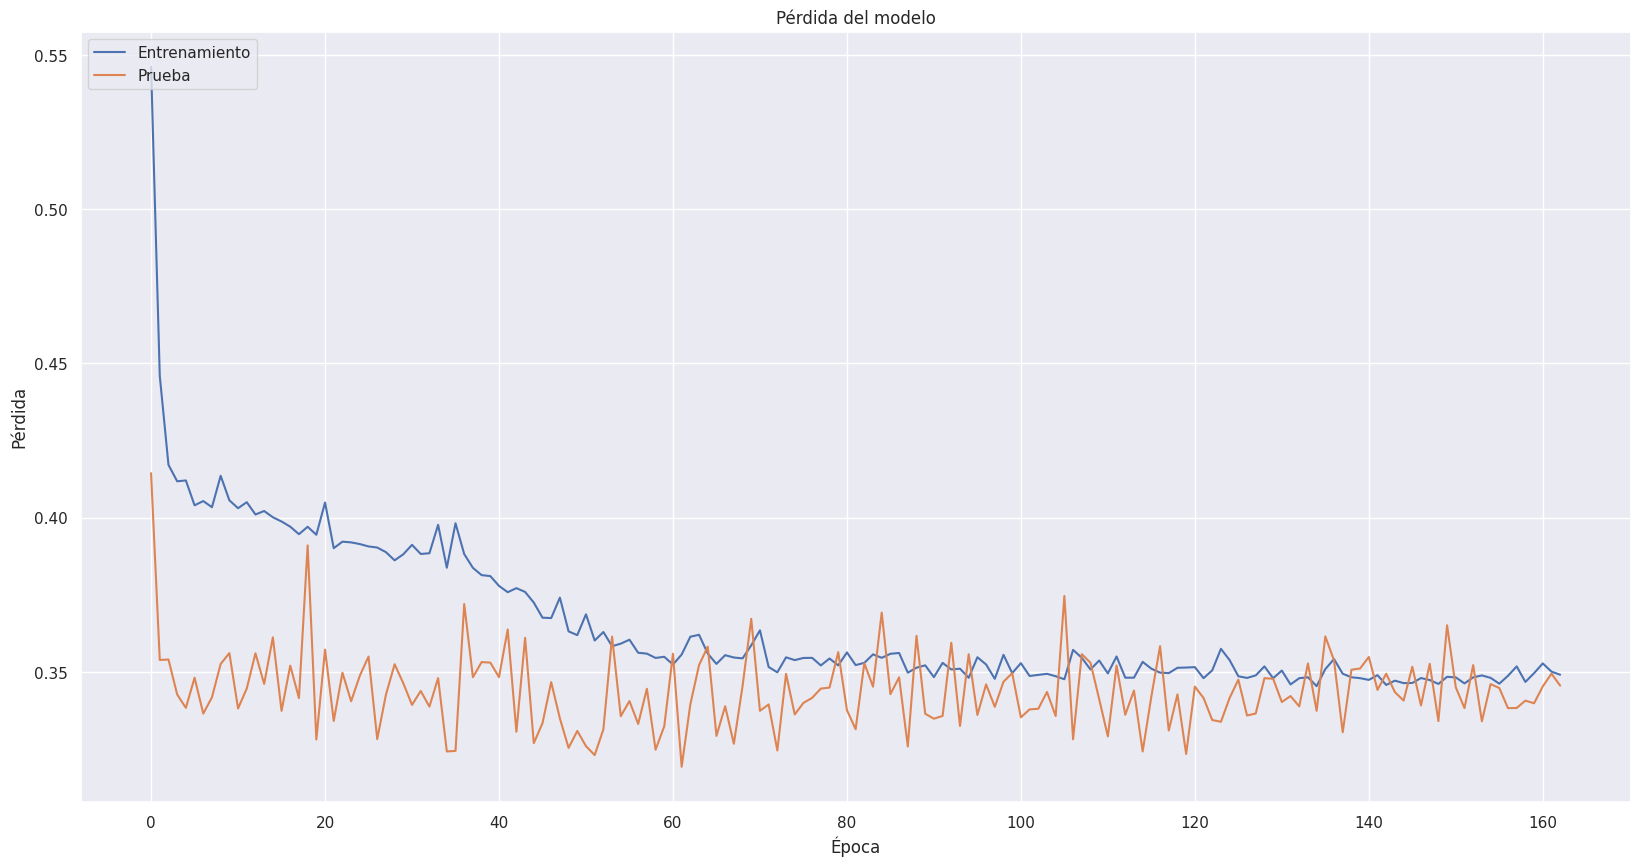

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

# Evaluación.

##  Mostrar los valores de bondad del modelo.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

6/6 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8804
Test loss: 0.3455905020236969
Test accuracy: 0.8804348111152649


## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [ ]:
predictions = model.predict(x_test)

y_pred = predictions.argmax(axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

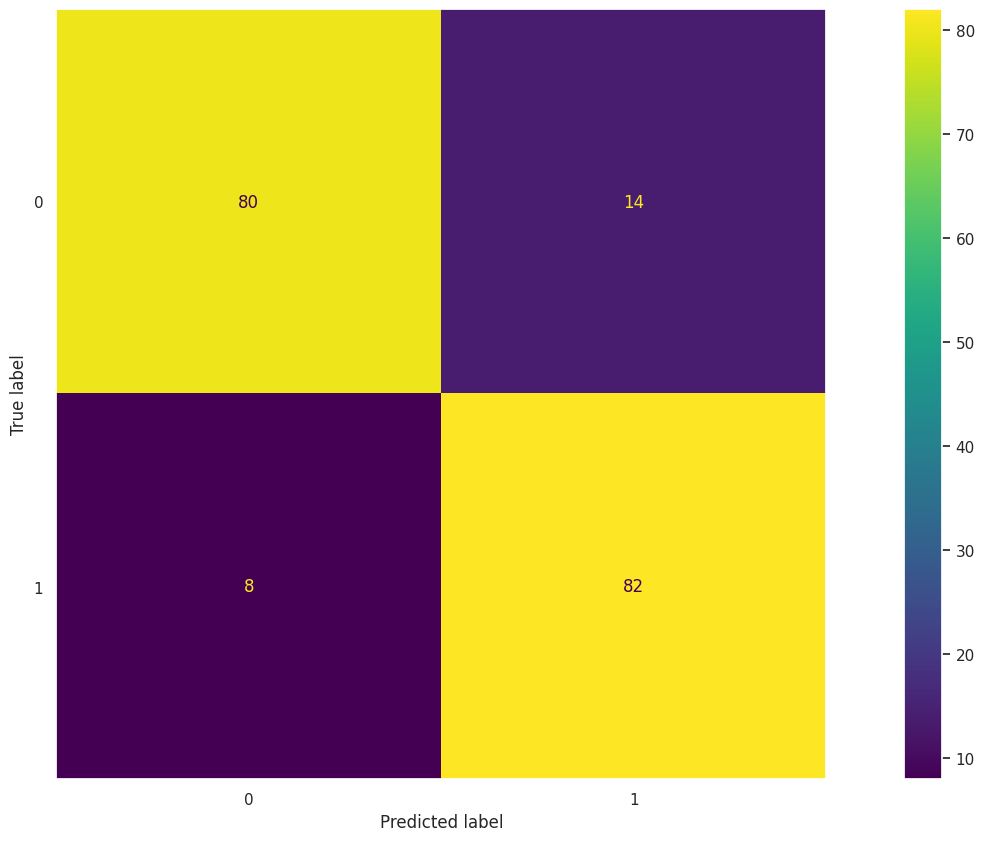

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis = 1), y_pred)
plt.grid(visible=None)